In [2]:
from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym

In [ ]:
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttFullBackBlaze"]
mycol = mydb["s_m_a_r_t_att_full_back_blaze"]

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]
model = "WDC WUH721414ALE6L4"
myquery = { "model": { "$eq": model }}
myfields = {"timestamp":1, "disk_id":1, "model":1, "failure":1, "_id":0, "r_sectors":1, "u_errors":1, "n_b_written":1, "command_timeout":1, "current_pending_sector_count":1, "uncorrectable_sector_count":1}

mydoc = mycol.find(myquery, myfields)

list = list(mydoc)
dfAllInformationPerHDDModel =  pd.DataFrame(list)

In [3]:
# Wheter it is necessary to load the files created above

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]

model = "ST8000NM0055"

dfAllInformationPerHDDModel = pd.read_csv('SplittedDatasetHDD/' + 'allInformationPerHDDModel' + model + '.csv')
#failedHDD = pd.read_csv('SplittedDatasetHDD/' + 'FailedHDDPerModel' + model + '.csv')
#operationalHDD = pd.read_csv('SplittedDatasetHDD/' + 'OperationalHDDPerModel' + model + '.csv')

In [4]:
dfAllInformationPerHDDModel.head()

,Unnamed: 0,timestamp,disk_id,model,failure,r_sectors,u_errors,n_b_written,command_timeout,current_pending_sector_count,uncorrectable_sector_count
0,0,2021-02-07,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
1,1,2021-02-08,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.546495e+09,0.0,0.0,0.0
2,2,2021-02-09,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,1.984626e+09,0.0,0.0,0.0
3,3,2021-02-10,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,2.900202e+09,0.0,0.0,0.0
4,4,2021-02-11,ZA100RXQ,ST8000NM0055,0.0,0.0,0.0,3.339698e+09,0.0,0.0,0.0


In [80]:
## group per day (daily mean) - reallocated sectors

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'r_sectors'].mean()

/tmp/ipykernel_235451/2443751835.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'r_sectors'].mean()


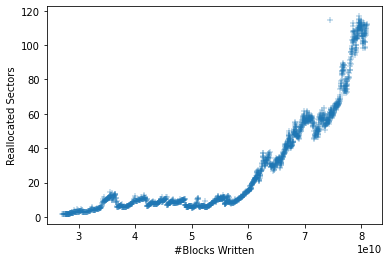

In [81]:
graph = sns.scatterplot(x = "n_b_written", y = 'r_sectors', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Reallocated Sectors")
plt.savefig('img/HDDReallocatedSectorsWritenBlocks' + model + '.pdf', dpi=1200)

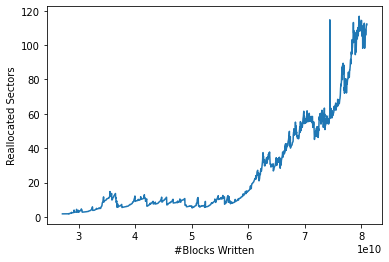

In [5]:
graph = sns.lineplot(x = "n_b_written", y = 'r_sectors', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Reallocated Sectors")
plt.savefig('img/HDDReallocatedSectorsWritenBlocksLine' + model + '.pdf')

In [39]:
## group per day (daily mean) - uncorrectable errors

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'u_errors'].mean()

/tmp/ipykernel_235451/33252946.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'u_errors'].mean()


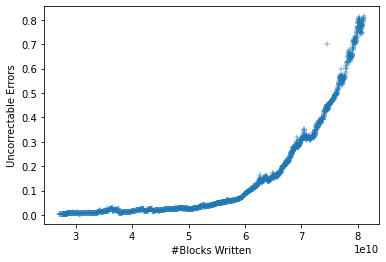

In [70]:
graph = sns.scatterplot(x = "n_b_written", y = 'u_errors', palette = 'deep',marker='+',  data = group, alpha=1)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Errors")
plt.savefig('img/HDDUncorrectableErrorsWritenBlocks' + model + '.pdf', dpi=1200)

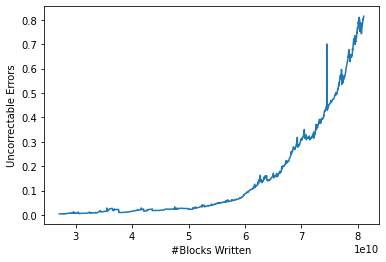

In [8]:
graph = sns.lineplot(x = "n_b_written", y = 'u_errors', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Errors")
plt.savefig('img/HDDUncorrectableErrorsWritenBlocksLine' + model + '.pdf')

In [71]:
## group per day (daily mean) - command timeout

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'command_timeout'].mean()

/tmp/ipykernel_235451/2747041450.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'command_timeout'].mean()


In [72]:
group.drop(group[group.command_timeout < 2.025803e+08].index, inplace=True)
group.drop(group[group.command_timeout > 5.598217e+08].index, inplace=True)

In [18]:
group.head()

,timestamp,n_b_written,command_timeout
0,2018-01-01,2.711532e+10,2.025803e+08
1,2018-01-02,2.718509e+10,2.025803e+08
2,2018-01-03,2.725681e+10,2.031770e+08
3,2018-01-04,2.731745e+10,2.031770e+08
4,2018-01-05,2.738682e+10,2.031770e+08


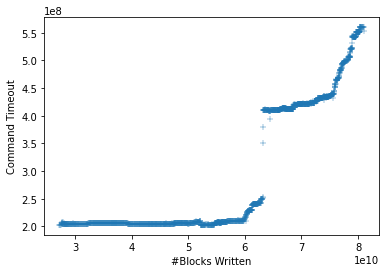

In [73]:
graph = sns.scatterplot(x = "n_b_written", y = 'command_timeout', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Command Timeout")
plt.savefig('img/HDDCommandTimeoutWritenBlocks' + model + '.pdf')

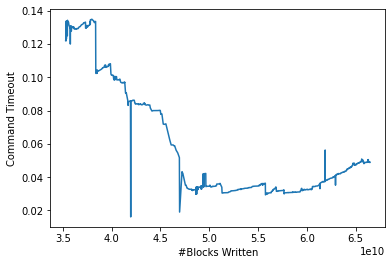

In [31]:
graph = sns.lineplot(x = "n_b_written", y = 'command_timeout', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Command Timeout")
plt.savefig('img/HDDCommandTimeoutWritenBlocksLine' + model + '.pdf')

In [75]:
## group per day (daily mean) - current pending sector count

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'current_pending_sector_count'].mean()



/tmp/ipykernel_235451/581711363.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'current_pending_sector_count'].mean()


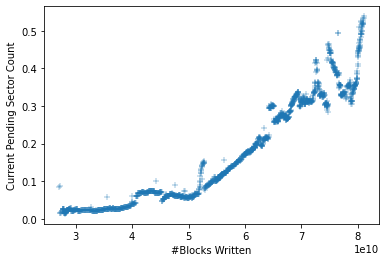

In [76]:
graph = sns.scatterplot(x = "n_b_written", y = 'current_pending_sector_count', palette = 'deep', marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Current Pending Sector Count")
plt.savefig('img/HDDCurrentPendingSectorCountWritenBlocks' + model + '.pdf')

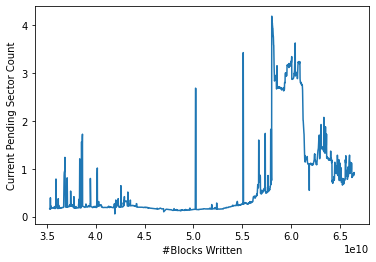

In [34]:
graph = sns.lineplot(x = "n_b_written", y = 'current_pending_sector_count', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Current Pending Sector Count")
plt.savefig('img/HDDCurrentPendingSectorCountWritenBlocksLine' + model + '.pdf')

In [77]:
## group per day (daily mean) - uncorrectable sector count

group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'uncorrectable_sector_count'].mean()

/tmp/ipykernel_235451/2108014959.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = dfAllInformationPerHDDModel.groupby(['timestamp'], as_index=False)['n_b_written', 'uncorrectable_sector_count'].mean()


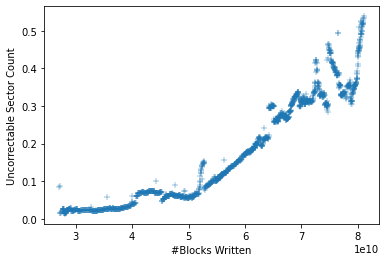

In [78]:
graph = sns.scatterplot(x = "n_b_written", y = 'uncorrectable_sector_count', palette = 'deep',marker='+', data = group, alpha=0.9)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Sector Count")
plt.savefig('img/HDDUnccorectableSectorCountWritenBlocks' + model + '.pdf')

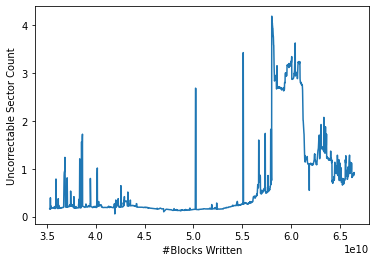

In [37]:
graph = sns.lineplot(x = "n_b_written", y = 'uncorrectable_sector_count', palette = 'deep', data = group)
graph.set(xlabel ="#Blocks Written", ylabel = "Uncorrectable Sector Count")
plt.savefig('img/HDDUnccorectableSectorCountWritenBlocksLine' + model + '.pdf')

In [3]:
# Wheter it is necessary to load the files created above

#models = ["HGST HMS5C4040BLE640", "HGST HUH728080ALE600", "HGST HUH721212ALN604", "ST4000DM000", "ST8000NM0055", "ST12000NM0008", "ST12000NM0007", "ST14000NM001G", "ST14000NM0138", "ST16000NM001G", "TOSHIBA MD04ABA400V", "TOSHIBA MG07ACA14TA", "WDC WUH721414ALE6L4"]

model = "ST8000NM0055"

#dfAllInformationPerHDDModel = pd.read_csv('SplittedDatasetHDD/' + 'allInformationPerHDDModel' + model + '.csv')
failedHDD = pd.read_csv('SplittedDatasetHDD/' + 'FailedHDDPerModel' + model + '.csv')
#operationalHDD = pd.read_csv('SplittedDatasetHDD/' + 'OperationalHDDPerModel' + model + '.csv')

In [4]:
## group per day (daily mean) - uncorrectable sector count

#failedHDD['timestamp'] = pd.to_datetime(failedHDD['timestamp'], format='%Y-%m-%d').dt.floor('D')

groupHDDFailures = failedHDD.groupby(['timestamp'], as_index=False)['disk_id'].count()
groupHDDFailures['disk_sum'] = groupHDDFailures.disk_id.cumsum()

groupHDDBlocks = failedHDD.groupby(['timestamp', 'disk_id'], as_index=False)['n_b_written'].mean()
groupHDDFailures['blocks_sum'] = groupHDDBlocks.n_b_written

In [5]:
groupHDDFailures.head()

,timestamp,disk_id,disk_sum,blocks_sum
0,2018-01-02,1,1,1.568691e+10
1,2018-01-09,1,2,2.603956e+10
2,2018-01-10,1,3,3.356442e+10
3,2018-01-11,2,5,2.083136e+10
4,2018-01-15,1,6,1.894737e+10


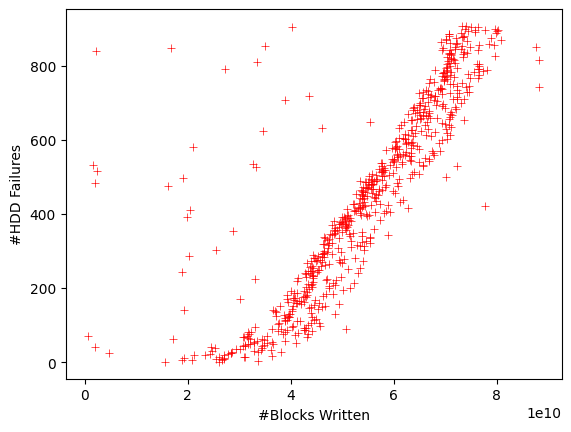

In [7]:
graph = sns.scatterplot(x = "blocks_sum", y = 'disk_sum', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="#Blocks Written", ylabel = "#HDD Failures")
plt.savefig('img/HDDFailuresBlocksWrittenScatter' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)


In [8]:
#checking correlation between operational days and written blocks

groupHDDFailures = failedHDD.groupby(['timestamp'], as_index=False)['disk_id'].count()
groupHDDFailures['disk_sum'] = groupHDDFailures.disk_id.cumsum()

groupHDDBlocks = failedHDD.groupby(['timestamp', 'disk_id'], as_index=False)['n_b_written'].mean()
groupHDDFailures['written_blocks'] = groupHDDBlocks.n_b_written
groupHDDFailures['written_blocks_cum'] = groupHDDBlocks.n_b_written.cumsum()

In [9]:
groupHDDFailures.head()

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum
0,2018-01-02,1,1,1.568691e+10,1.568691e+10
1,2018-01-09,1,2,2.603956e+10,4.172648e+10
2,2018-01-10,1,3,3.356442e+10,7.529089e+10
3,2018-01-11,2,5,2.083136e+10,9.612225e+10
4,2018-01-15,1,6,1.894737e+10,1.150696e+11


In [11]:
groupHDDFailures['timestamp'] = pd.to_datetime(groupHDDFailures['timestamp'], format='%Y-%m-%d').dt.floor('D')
groupHDDFailures["operational_days"] = " "
groupHDDFailures.operational_days.iloc[0] = 0

for i in range(1, len(groupHDDFailures)): 
    
    groupHDDFailures.operational_days.iloc[i] = (groupHDDFailures.timestamp.iloc[i] - groupHDDFailures.timestamp.iloc[i-1]).days

groupHDDFailures["operational_days_cum"] = groupHDDFailures.operational_days.cumsum()

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_72382/4244399620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupHDDFailures.operational_days.iloc[0] = 0
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_72382/4244399620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupHDDFailures.operational_days.iloc[i] = (groupHDDFailures.timestamp.iloc[i] - groupHDDFailures.timestamp.iloc[i-1]).days


In [10]:
groupHDDFailures.head(10)

,timestamp,disk_id,disk_sum,written_blocks,written_blocks_cum,operational_days,operational_days_cum
0,2018-01-02,1,1,1.568691e+10,1.568691e+10,0,0
1,2018-01-09,1,2,2.603956e+10,4.172648e+10,7,7
2,2018-01-10,1,3,3.356442e+10,7.529089e+10,1,8
3,2018-01-11,2,5,2.083136e+10,9.612225e+10,1,9
4,2018-01-15,1,6,1.894737e+10,1.150696e+11,4,13
5,2018-01-17,1,7,2.657626e+10,1.416459e+11,2,15
6,2018-01-27,1,8,2.558315e+10,1.672290e+11,10,25
7,2018-01-28,1,9,2.671386e+10,1.939429e+11,1,26
8,2018-01-30,1,10,2.704722e+10,2.209901e+11,2,28
9,2018-02-04,1,11,1.919571e+10,2.401858e+11,5,33


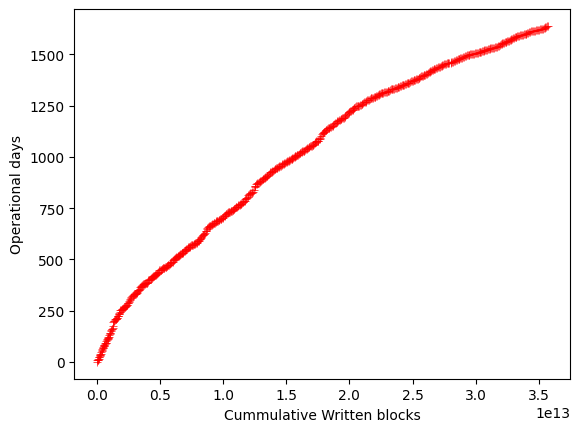

In [19]:
graph = sns.scatterplot(x = "written_blocks_cum", y = 'operational_days_cum', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="Cummulative Written blocks", ylabel = "Operational days")
plt.savefig('img/OperationalDaysBlocksWrittenScatter' + model + '.pdf')

In [28]:
x = pd.to_numeric(groupHDDFailures["operational_days_cum"])
y = pd.to_numeric(groupHDDFailures["written_blocks_cum"])
x.corr(y)

0.9852692297581362

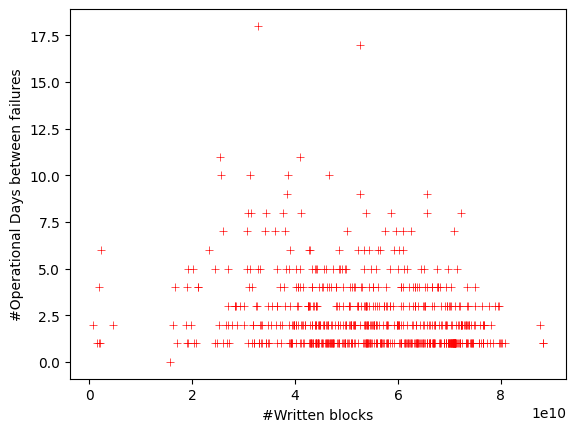

In [13]:
graph = sns.scatterplot(x = "written_blocks", y = 'operational_days', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="#Written blocks", ylabel = "#Operational Days between failures")
plt.savefig('img/OperationalDaysCumBlocksWrittenScatter' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)

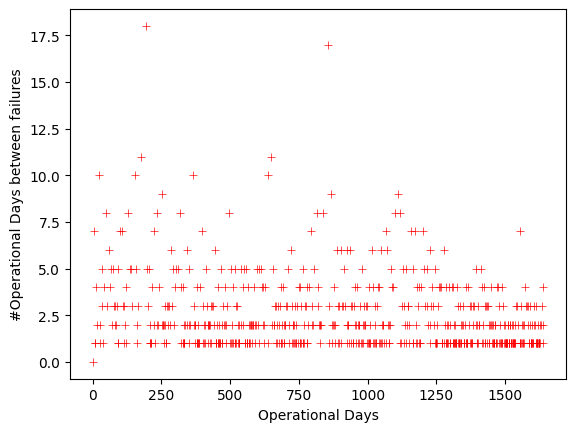

In [20]:
graph = sns.scatterplot(x = "operational_days_cum", y = 'operational_days', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="Operational Days", ylabel = "#Operational Days between failures")
plt.savefig('img/OperationalDaysCumBlocksWrittenScatter' + model + '.pdf')
#plt.setp(graph.get_xticklabels(), rotation=45)

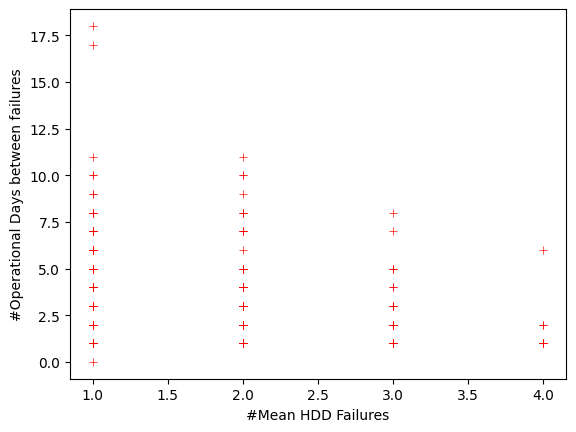

In [22]:
graph = sns.scatterplot(x = "disk_id", y = 'operational_days', color = 'red', data = groupHDDFailures, marker='+')
graph.set(ylabel ="#Operational Days between failures", xlabel = "#Mean HDD Failures")
plt.savefig('img/OperationalDaysHDDFailures' + model + '.pdf')

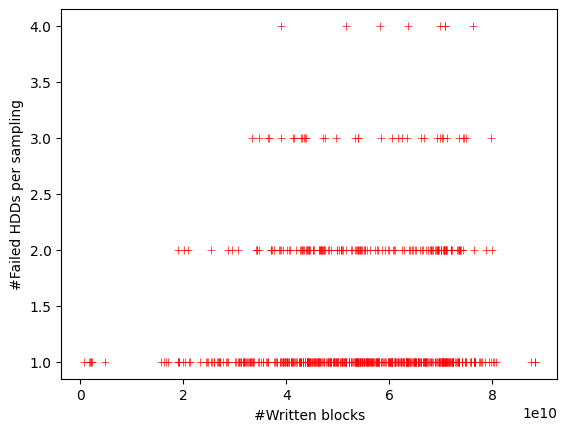

In [31]:
graph = sns.scatterplot(y = "disk_id", x = 'written_blocks', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="#Written blocks", ylabel = "#Failed HDDs per sampling")
plt.savefig('img/OperationalDaysHDDFailures' + model + '.pdf')

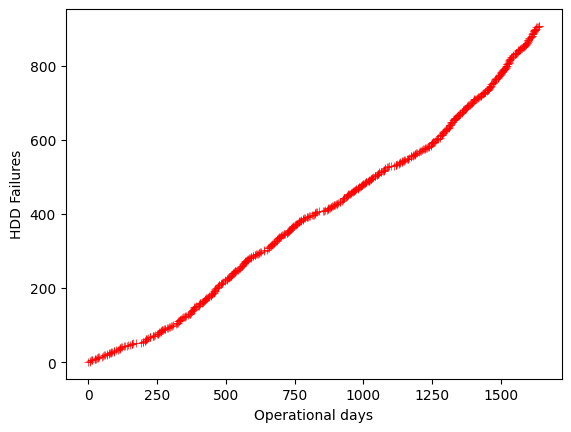

In [26]:
graph = sns.scatterplot(y = "disk_sum", x = 'operational_days_cum', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="Operational days", ylabel = "HDD Failures")
plt.savefig('img/OperationalDaysCumHDDFailures' + model + '.pdf')

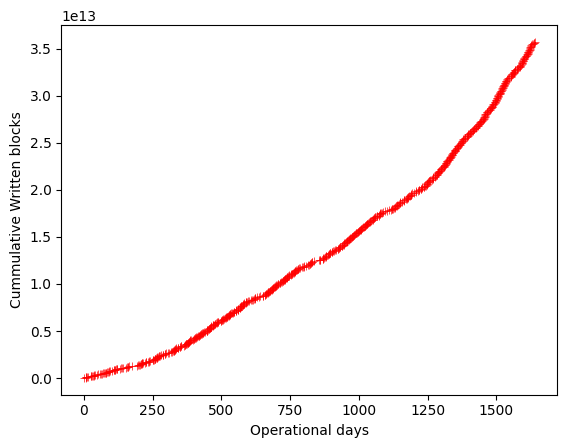

In [24]:
graph = sns.scatterplot(y = "written_blocks_cum", x = 'operational_days_cum', color = 'red', data = groupHDDFailures, marker='+')
graph.set(xlabel ="Operational days", ylabel = "Cummulative Written blocks")
plt.savefig('img/OperationalDaysCumHDDFailures' + model + '.pdf')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

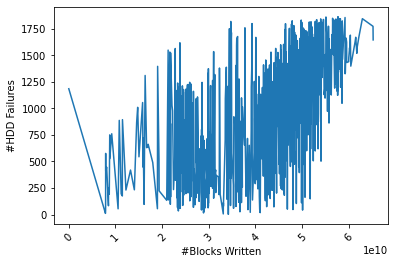

In [41]:
graph = sns.lineplot(x = "blocks_sum", y = 'disk_sum', palette = 'deep', data = groupHDDFailures)
graph.set(xlabel ="#Blocks Written", ylabel = "#HDD Failures")
plt.savefig('img/HDDFailuresBlocksWrittenLine' + model + '.pdf')
plt.setp(graph.get_xticklabels(), rotation=45)


In [45]:
groupHDDFailures['timestamp'] = pd.to_datetime(groupHDDFailures['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [46]:
#dynamic mttf 

#resultWriteFailureNone["AFR"] = ((resultWriteFailureNone["cum_sum"])*((resultWriteFailureNone["timestamp"]-resultWriteFailureNone["timestamp"].iloc[0]).days))/(resultWriteFailureNone.size)

hours_per_year = 365*24
numberTotalSSDs = groupHDDFailures.size

groupHDDFailures["AFR_HDDs"] = " "
groupHDDFailures["MTTF_HDDs"] = " "
groupHDDFailures["MTTFMes_HDDs"] = " "
groupHDDFailures["MTTFDia_HDDs"] = " "

for i in range(1, len(groupHDDFailures)): 
    

    numberFailedSSDs = groupHDDFailures.iloc[i].disk_sum
    if numberFailedSSDs != 0:
        temp = ((groupHDDFailures.timestamp.iloc[i] - groupHDDFailures.timestamp.iloc[0]).days)/30
        AFR_HDDs = ((numberFailedSSDs)*(12/temp))/(15290)
        MTTF_HDDs = (hours_per_year)/(AFR_HDDs)
        MTTFMes_HDDs = (12)/(AFR_HDDs)
        MTTFDia_HDDs = (365)/(AFR_HDDs)
    else: 
        AFR_HDDs = 0
        MTTF_HDDs = 0
        MTTFMes_HDDs = 0
        MTTFDia_HDDs = 0


    #resultWriteFailureRM.loc[i, "AFR_SSDs"] = AFR_SSDs
    #resultWriteFailureRM.loc[i, "mttf_SDDs"] = MTTF_SSDs
    groupHDDFailures.AFR_HDDs.iloc[i] = AFR_HDDs
    groupHDDFailures.MTTF_HDDs.iloc[i] = str(MTTF_HDDs) + ','
    groupHDDFailures.MTTFMes_HDDs.iloc[i] = str(MTTFMes_HDDs) + ','
    groupHDDFailures.MTTFDia_HDDs.iloc[i] = str(MTTFDia_HDDs) + ','

/tmp/ipykernel_239855/2988620775.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupHDDFailures.AFR_HDDs.iloc[i] = AFR_HDDs
/tmp/ipykernel_239855/2988620775.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupHDDFailures.MTTF_HDDs.iloc[i] = str(MTTF_HDDs) + ','
/tmp/ipykernel_239855/2988620775.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupHDDFailures.MTTFMes_HDDs.iloc[i] = str(MTTFMes_HDDs) + ','
/tmp/ipykernel

In [47]:
groupHDDFailures.tail(100)

,timestamp,disk_id,disk_sum,blocks_sum,AFR_HDDs,MTTF_HDDs,MTTFMes_HDDs,MTTFDia_HDDs
566,2022-01-21,1,763,6.984842e+10,0.012138,"721682.6561817388,","988.6063783311491,","30070.11067423912,"
567,2022-01-23,1,764,6.712433e+10,0.012138,"721712.0157068062,","988.6465968586386,","30071.33398778359,"
568,2022-01-24,1,765,7.031945e+10,0.012145,"721254.9498910675,","988.0204793028321,","30052.289578794476,"
569,2022-01-25,1,766,7.647595e+10,0.012153,"720799.0774586597,","987.3959965187119,","30033.29489411082,"
570,2022-01-29,1,767,7.493727e+10,0.012136,"721799.6349413298,","988.7666232073012,","30074.98478922208,"
...,...,...,...,...,...,...,...,...
661,2022-06-19,3,903,7.495488e+10,0.013052,"671185.2823920265,","919.4318936877075,","27966.053433001107,"
662,2022-06-22,1,904,7.637516e+10,0.013042,"671677.5221238938,","920.1061946902655,","27986.56342182891,"
663,2022-06-26,1,905,4.023788e+10,0.013024,"672579.7863720073,","921.3421731123389,","28024.157765500306,"
664,2022-06-28,1,906,7.330839e+10,0.013023,"672658.7417218543,","921.4503311258278,","28027.44757174393,"


In [48]:
## Saving spllited values into a csv file

groupHDDFailures.to_csv('SplittedDatasetHDD/' + 'extractedMTTF'  + model + '.csv')